<a href="https://colab.research.google.com/github/Manith-Ratnayake/Adult_Income_Census_UCI/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[0. Google Drive Set Up](#scrollTo=qi4nzm-UbvwX)

>[1. Libraries](#scrollTo=9zrJ08dxDfxq)

>[2. File Reading](#scrollTo=oLJ-am5qb2e_)

>[3. Data Set Overview](#scrollTo=gpyoZus_mURE)

>[4. Column Overview](#scrollTo=FIwNDTGW1iFO)

>>>[Empty Columns](#scrollTo=662Cg6Vz4CMP)

>>>[Not Empty Columns](#scrollTo=VfmAT343QZce)

>[Missing Values](#scrollTo=q48TEBmyPIsZ)

>[Feature Engineering](#scrollTo=t8oCqWAxS3-n)

>[Explotary Data Analysis (EDA)](#scrollTo=Zz3ZA2wcKTzw)

>[Training Testing Data Set](#scrollTo=nodSXMynmq2N)

>[Encoding](#scrollTo=ZeiMv5cJTxDG)

>[Feature Scaling](#scrollTo=8cuu3Nx0HV7c)

>[Model Input Variables](#scrollTo=Oai6EEdpqaIw)

>[Naive Bayes](#scrollTo=PcDBziRyl46t)

>>>[Naive Bayes Basic Model](#scrollTo=WBx7UA-QNzCi)

>>>[Naive Bayes Basic Model Evaluation](#scrollTo=XoyGD-jjcQHE)

>>>>>>[Classification Report](#scrollTo=yco-yaweyDgZ)

>>>>>>[Confusion Matix](#scrollTo=bx36zmEAkHkE)

>>>>>>[ROC Curve](#scrollTo=upGHn9abkTxY)

>>>>>>[Precision-Recall Curve](#scrollTo=YXJLTqOwkZ27)

>>>>>>[Learning Curve](#scrollTo=cN6HcmJFlu6t)

>>>>>>[CV score](#scrollTo=Dv7fGxNJloVG)

>>>[Naive Bayes Experimental Model](#scrollTo=5zTTlefsOf8o)

>>>[Naive Bayes Experimental Model Evaluation](#scrollTo=QmRvdCoA1Qon)

>>>>>>[Classification Report](#scrollTo=Ee7ny8hfLqie)

>>>>>>[Confussion Matrix](#scrollTo=fR6szLuMlmM5)

>>>>>>[ROC Curve](#scrollTo=dH1r50Tqny4q)

>>>>>>[Precision Recall Curve (PRC)](#scrollTo=geYGrHTCn9dd)

>>>>>>[Learning Curve](#scrollTo=d6ASMPUknn9e)

>[Random Forest](#scrollTo=2PgUFKqHmAPN)

>>>[Random Forest Basic Model](#scrollTo=olhfzFolOAMh)

>>>[Random Forest Basic Model Evaluation](#scrollTo=r7rHvmgWb3R7)

>>>>>>[Classification Report](#scrollTo=GE4x84V1o9FL)

>>>>>>[Confusion Matrix](#scrollTo=wbYi6ztIon8f)

>>>>>>[ROC Curve](#scrollTo=tcm92T9YpEcj)

>>>>>>[Precision-Recall Curve (PRC)](#scrollTo=_ECjcFgQiwAb)

>>>>>>[Learning Curve](#scrollTo=UkRL914ui19q)

>>>>>>[Column Importance](#scrollTo=fpW_7pYY5qoP)

>>>[Random Forest Experimental Model](#scrollTo=5yM87jXLNqbZ)

>>>[Random Forest Experimental Model Evaluation](#scrollTo=9WZg3mzhb_io)

>>>>>>[Classification Report](#scrollTo=_qzWeCUbkCE7)

>>>>>>[Confusion Matrix](#scrollTo=BDMnRZs-oWnA)

>>>>>>[ROC Curve](#scrollTo=UhZbEjhBod_U)

>>>>>>[Precision-Recall Curve (PRC)](#scrollTo=ji0Of-HIp4x_)

>>>>>>[Learning Curve](#scrollTo=G2KHh-osp_Jt)

>>>>>>[Column Importance](#scrollTo=aOgvzB_boK3O)



#**0. Google Drive Set Up**


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#**1. Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

#**2. File Reading**

In [ ]:
# Location
# adult_file_data_path = '/content/drive/My Drive/Machine Learning/adult.data'
# adult_file_test_path = '/content/drive/My Drive/Machine Learning/adult.test'

adult_file_data_path = 'adult.data'
adult_file_test_path = 'adult.test'

# Reading
adult_data = pd.read_csv(adult_file_data_path, delimiter=',', header=None)
adult_test = pd.read_csv(adult_file_test_path, delimiter=',', header=None, skiprows=1)

# Columns
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

adult_data.columns = column_names
adult_test.columns = column_names

#**3. Data Set Overview**

In [ ]:
# Checking the first few rows
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Statistics
adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
# No of Rows and columns in adult data
adult_data.shape

(32561, 15)

In [ ]:
# No of Rows and columns adult test
adult_test.shape

(16281, 15)

#**4. Column Overview**

In [ ]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
adult_data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [ ]:
# Type
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

###**Empty Columns**

In [ ]:
adult_data['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [ ]:
adult_data['native-country'].value_counts()

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [ ]:
adult_data['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

###**Not Empty Columns**

In [ ]:
# Distribution of the target variable
adult_data['capital-gain'].value_counts()

capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [ ]:
# Gender
adult_data['sex'].value_counts()

sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [ ]:
# Education
adult_data['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [ ]:
adult_data['education-num'].value_counts()

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [ ]:
# Distribution of the target variable
adult_data['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

#**Missing Values**

In [ ]:
# Null columns filled with most frequently ocuured value in that column
adult_data['workclass'] = adult_data['workclass'].replace('?', 'Private')
adult_data['occupation'] = adult_data['occupation'].replace('?', 'Prof-specialty')
adult_data['native-country'] = adult_data['native-country'].replace('?', 'United-States')

# Same for Testing Data Set
adult_test['workclass'] = adult_test['workclass'].replace('?', 'Private')
adult_test['occupation'] = adult_test['occupation'].replace('?', 'Prof-specialty')
adult_test['native-country'] = adult_test['native-country'].replace('?', 'United-States')

#**Feature Engineering**

In [ ]:
# Education Category
adult_data.education= adult_data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
adult_data.education = adult_data.education.replace('HS-grad', 'high school')
adult_data.education = adult_data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
adult_data.education = adult_data.education.replace('Bachelors', 'undergrad')
adult_data.education = adult_data.education.replace('Masters', 'grad')
adult_data.education = adult_data.education.replace('Doctorate', 'doc')

# Same for Testing Data Set
adult_test.education= adult_test.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
adult_test.education = adult_test.education.replace('HS-grad', 'high school')
adult_test.education = adult_test.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
adult_test.education = adult_test.education.replace('Bachelors', 'undergrad')
adult_test.education = adult_test.education.replace('Masters', 'grad')
adult_test.education = adult_test.education.replace('Doctorate', 'doc')

In [ ]:
# Martial status
adult_data['marital-status']= adult_data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
adult_data['marital-status'] = adult_data['marital-status'].replace(['Never-married'], 'not-married')
adult_data['marital-status'] = adult_data['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                'Married-spouse-absent'], 'other')


# Same for Testing Data Set
adult_test['marital-status'] = adult_test['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
adult_test['marital-status'] = adult_test['marital-status'].replace(['Never-married'], 'not-married')
adult_test['marital-status'] = adult_test['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                'Married-spouse-absent'], 'other')

#**Explotary Data Analysis (EDA)**

<Axes: xlabel='income', ylabel='count'>

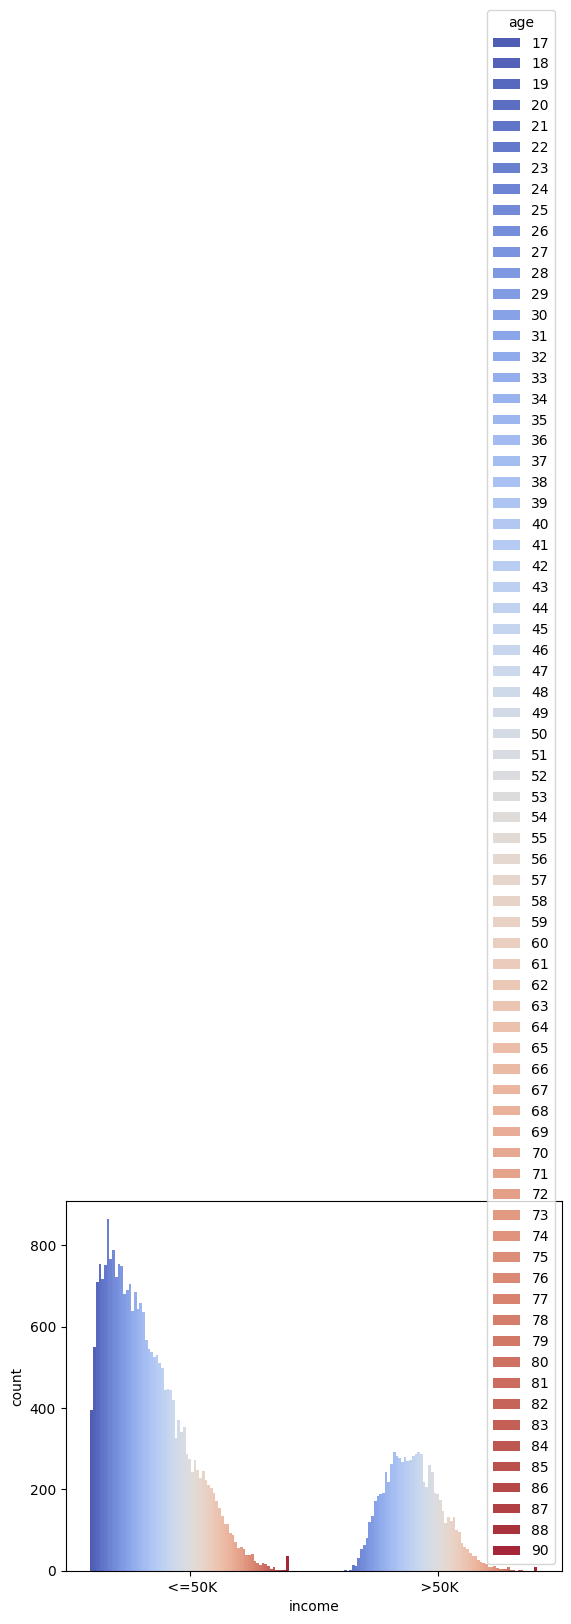

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='age', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

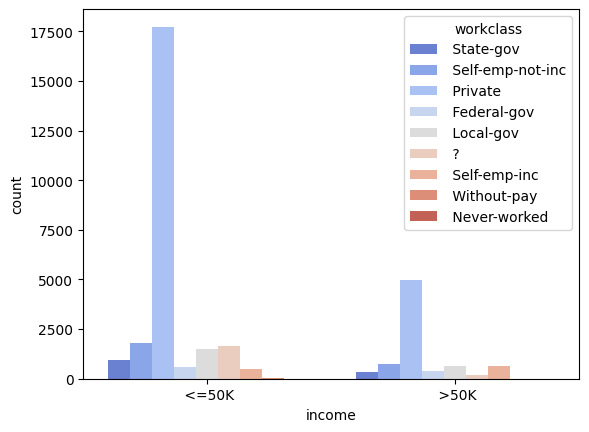

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='workclass', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

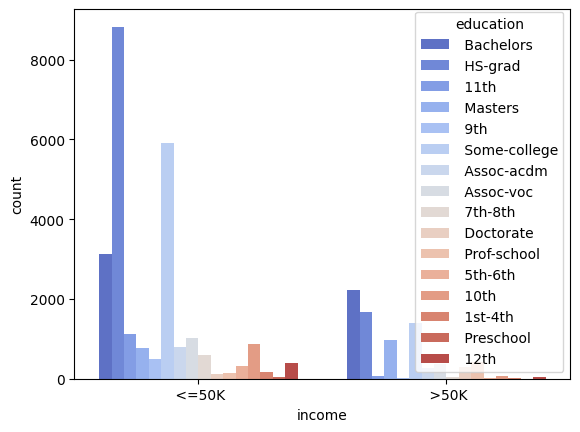

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='education', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

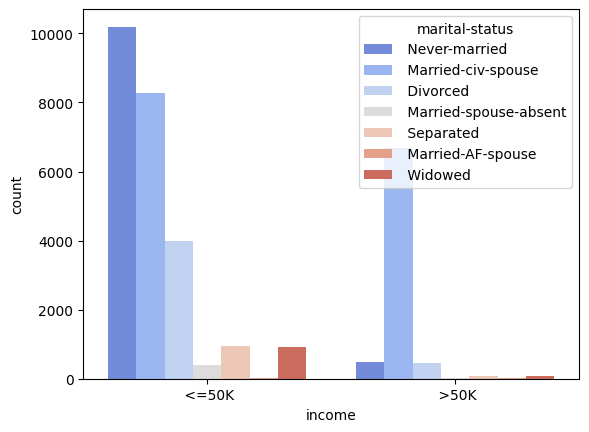

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='marital-status', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

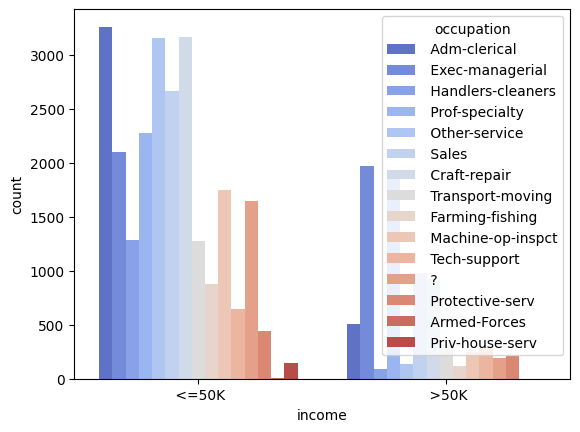

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='occupation', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

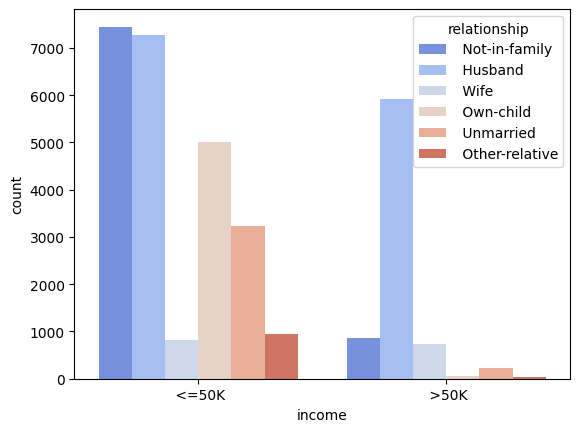

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='relationship', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

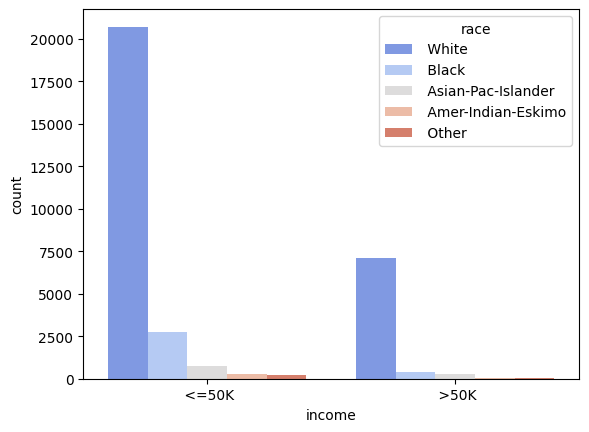

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='race', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

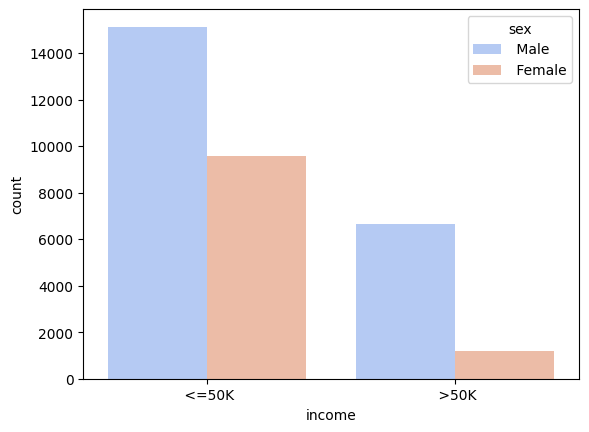

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='sex', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

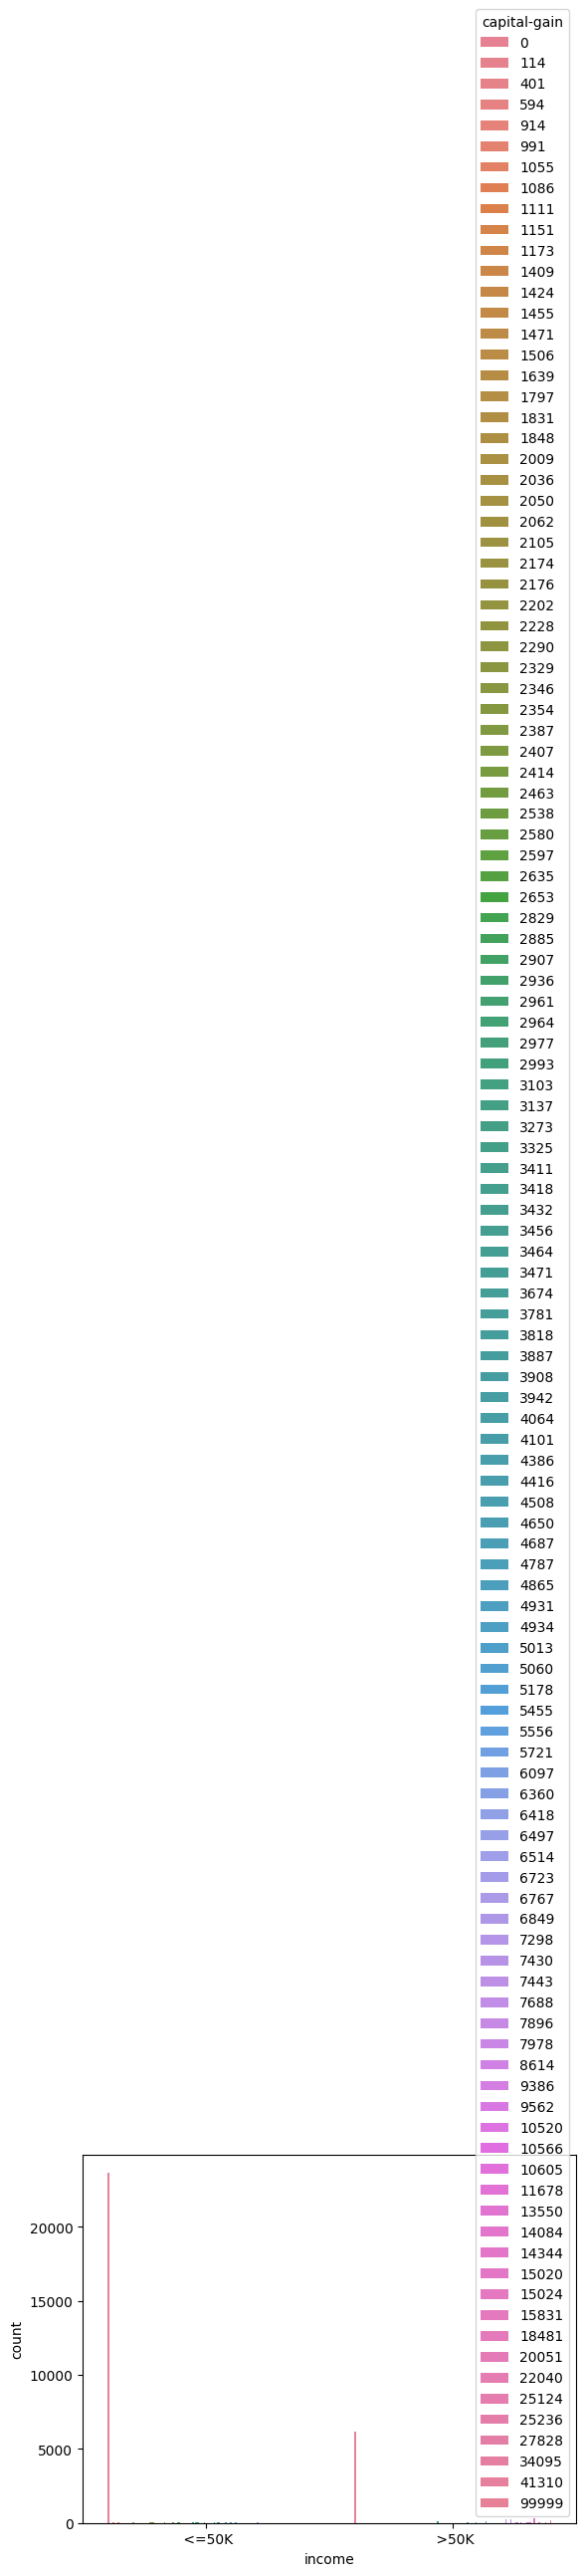

In [ ]:
sns.countplot(x='income', palette='husl', hue='capital-gain', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

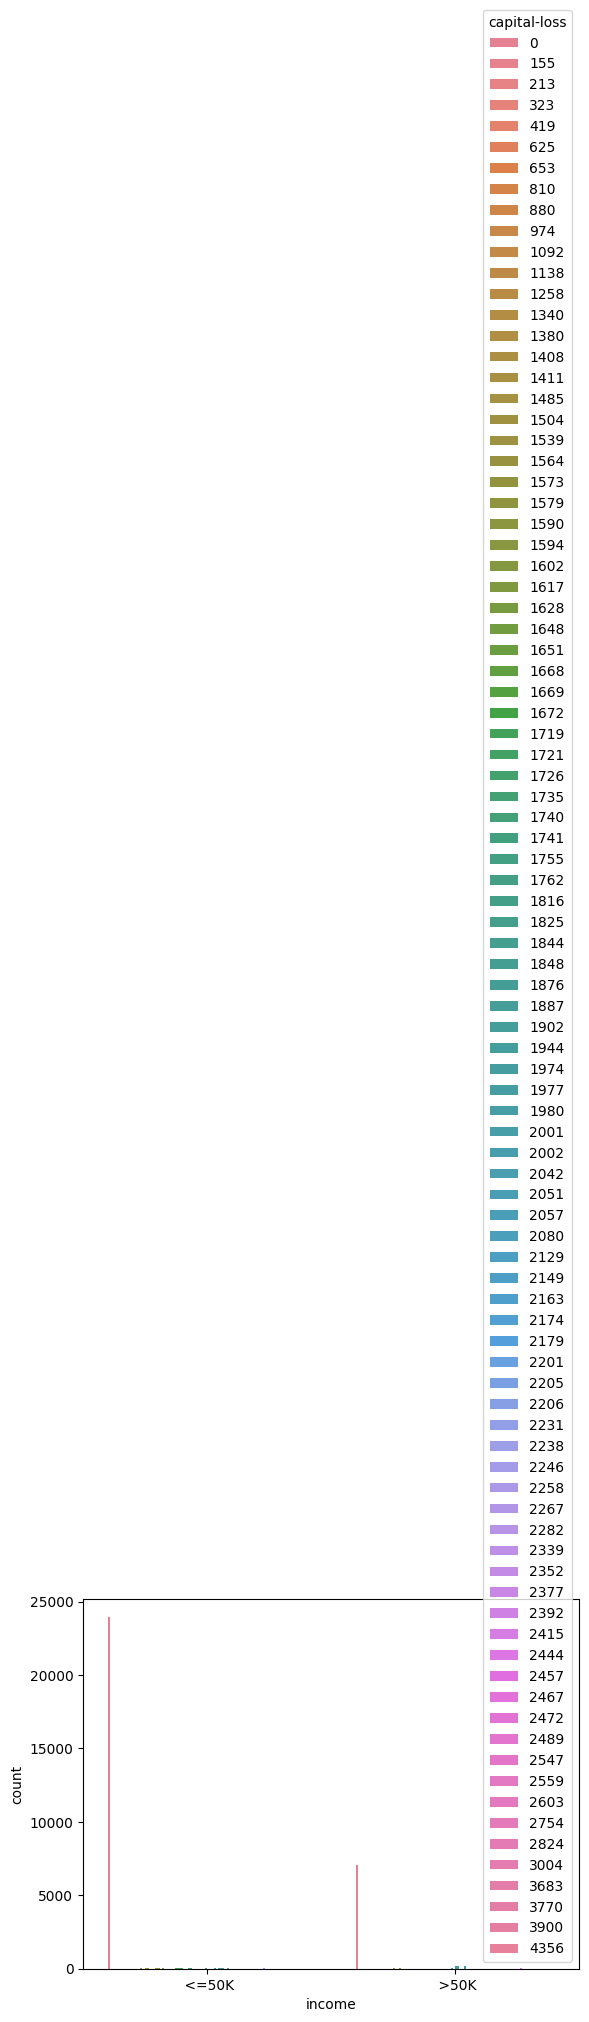

In [ ]:
sns.countplot(x='income', palette='husl', hue='capital-loss', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

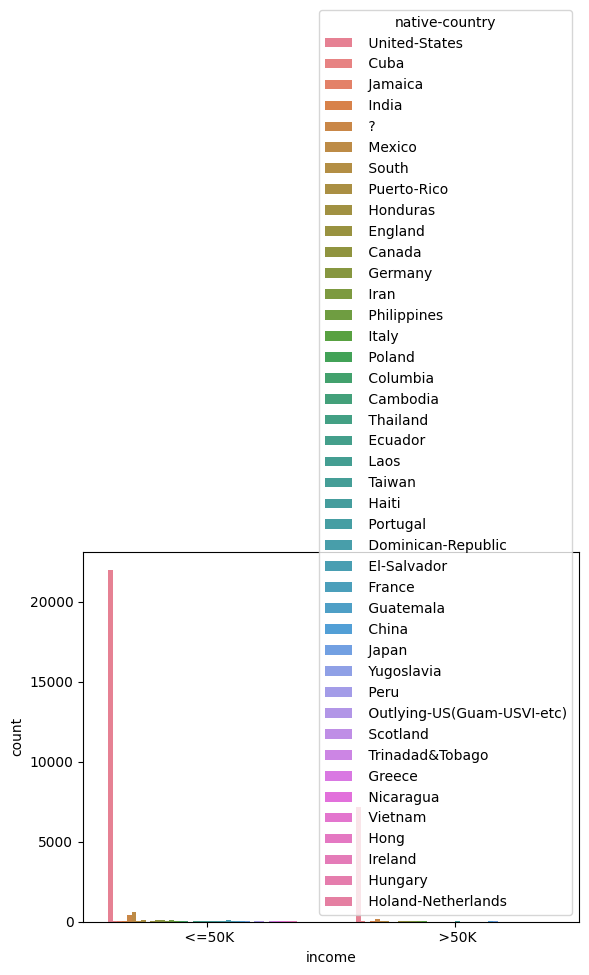

In [ ]:
sns.countplot(x='income', palette='husl', hue='native-country', data=adult_data)

In [ ]:
adult_data.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<Axes: >

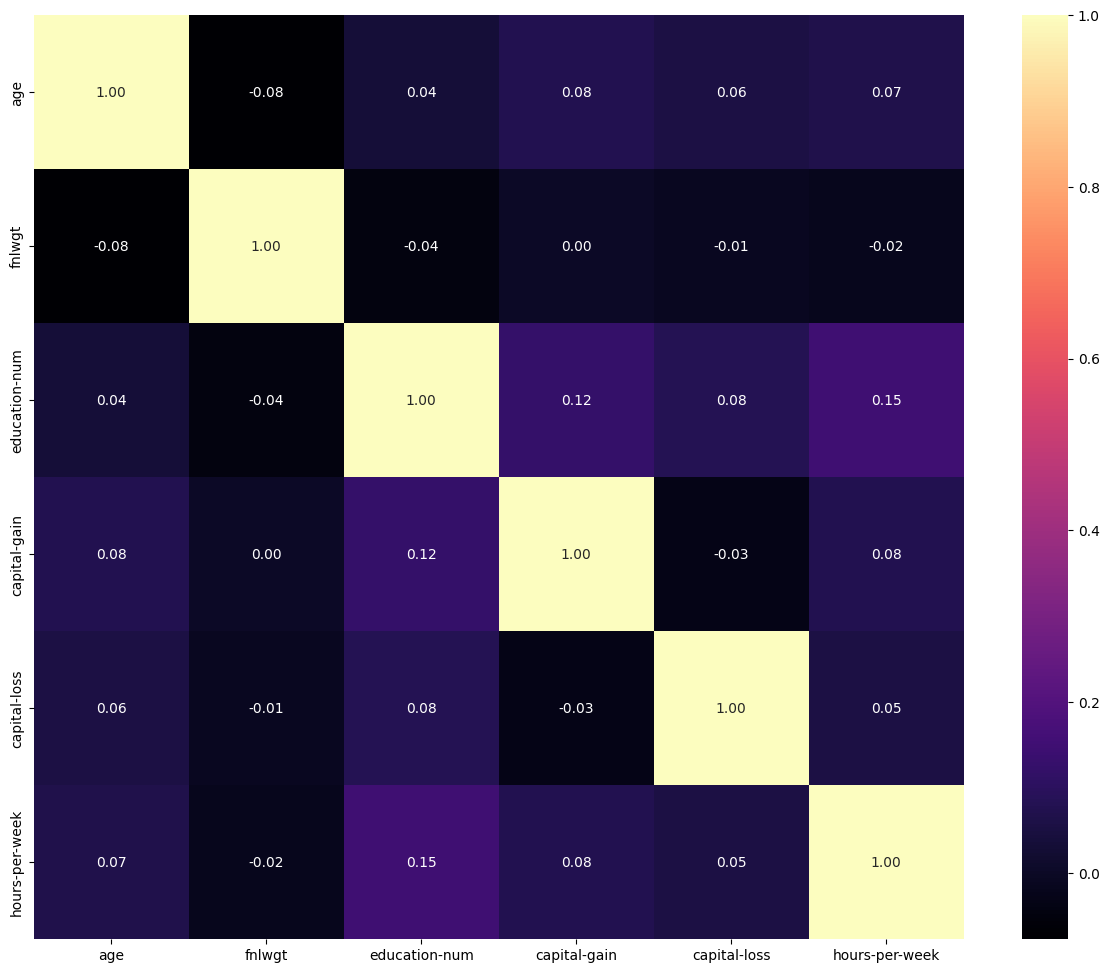

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(adult_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='magma')

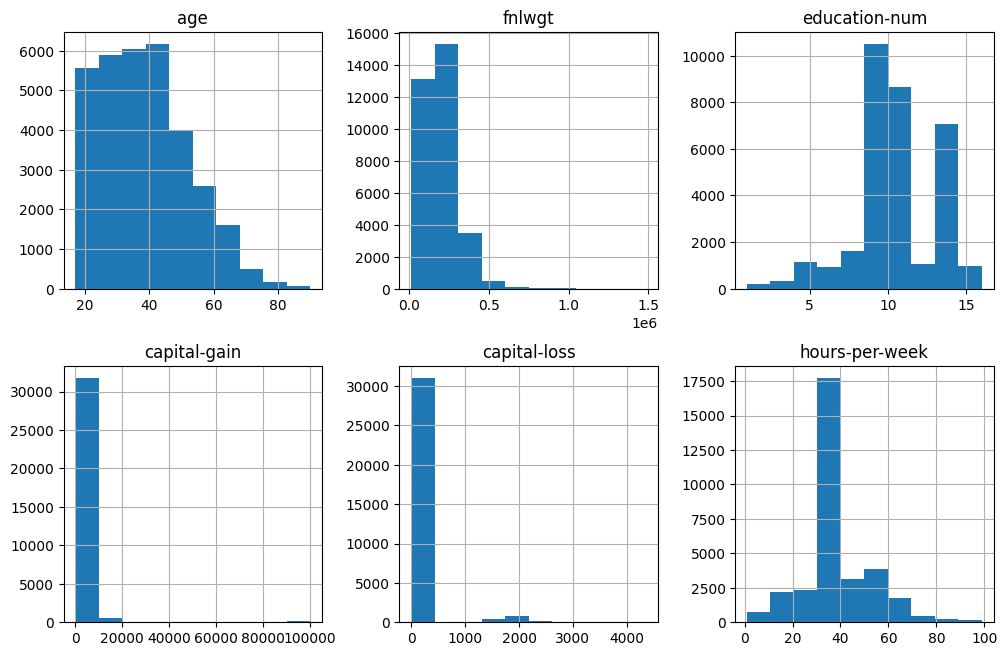

In [ ]:
adult_data.hist(figsize=(12,12), layout=(3,3), sharex=False);

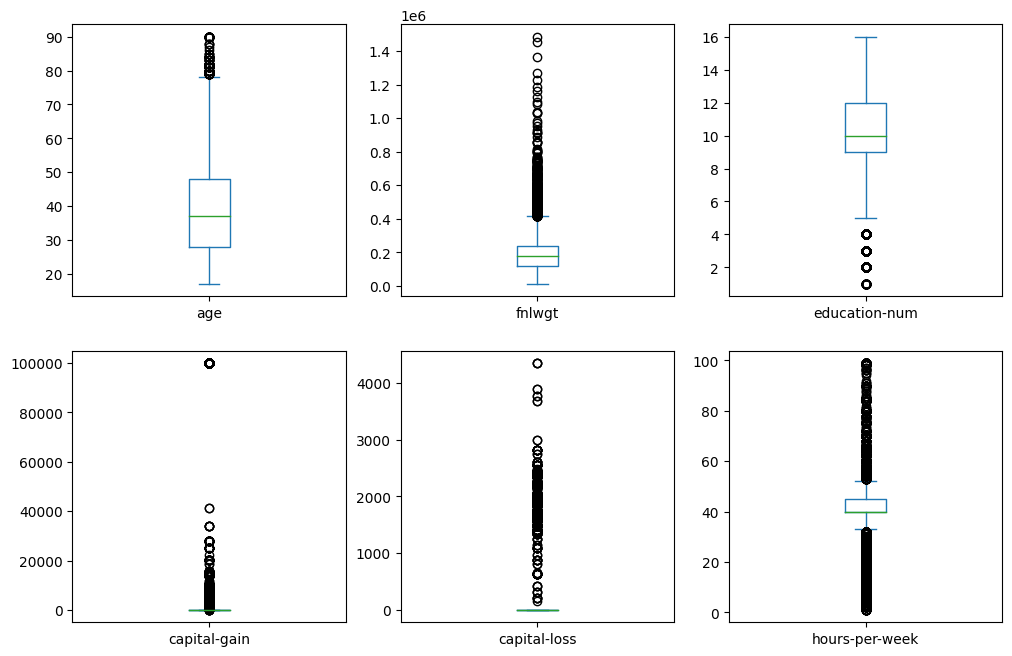

In [ ]:
adult_data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

#**Training Testing Data Set**

In [ ]:
# Training Income Column
adult_data['income'] = adult_data['income'].str.strip().replace({'<=50K': 0, '>50K': 1})

# Testing Income Column
adult_test['income'] = adult_test['income'].str.strip().replace({'<=50K.': 0, '>50K.': 1})

In [ ]:
# Train Set
X_train = adult_data.drop('income', axis=1)
y_train = adult_data['income']

# Test Set
X_test = adult_test.drop('income', axis=1)
y_test = adult_test['income']

#**Encoding**

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Confirming both datasets have the same set of columns after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

#**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

#**Model Input Variables**

In [ ]:
X_train_scaled

array([[ 0.03067056, -1.06361075,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.83710898, -1.008707  ,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.04264203,  0.2450785 , -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-1.21564337,  0.11095988, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.98373415,  0.92989258, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266]])

In [ ]:
X_test_scaled

array([[-0.99570562,  0.35077413, -1.19745882, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.04264203, -0.94709543, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.77576787,  1.39436215,  0.74603917, ...,  0.34095391,
        -0.04540836, -0.02217266],
       ...,
       [-0.04264203,  1.75468988,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.39723348, -1.00321189,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.26257978, -0.07229261,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266]])

In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [ ]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64

#**Naive Bayes**

###**Naive Bayes Basic Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_base_basic_model = GaussianNB()
naive_base_basic_model.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
naive_base_y_predictions = naive_base_basic_model.predict(X_test_scaled)

###**Naive Bayes Basic Model Evaluation**


######**Classification Report**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

print(classification_report(y_test,naive_base_y_predictions))
print("Accuracy : ", accuracy_score(y_test,naive_base_y_predictions),"\n")

              precision    recall  f1-score   support

           0       0.96      0.33      0.49     12435
           1       0.31      0.96      0.47      3846

    accuracy                           0.48     16281
   macro avg       0.64      0.65      0.48     16281
weighted avg       0.81      0.48      0.49     16281

Accuracy :  0.4801916344204901 



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

positive_label = 1

precision = precision_score(y_test, naive_base_y_predictions, pos_label=positive_label)
recall = recall_score(y_test, naive_base_y_predictions, pos_label=positive_label)
f1 = f1_score(y_test, naive_base_y_predictions, pos_label=positive_label)

y_prob = naive_base_basic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
naive_bayes_auc = roc_auc_score(y_test, y_prob)  # Now correctly using probabilities

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {naive_bayes_auc:.4f}\n")


Precision: 0.3074
Recall: 0.9584
F1 Score: 0.4656
AUC: 0.7111



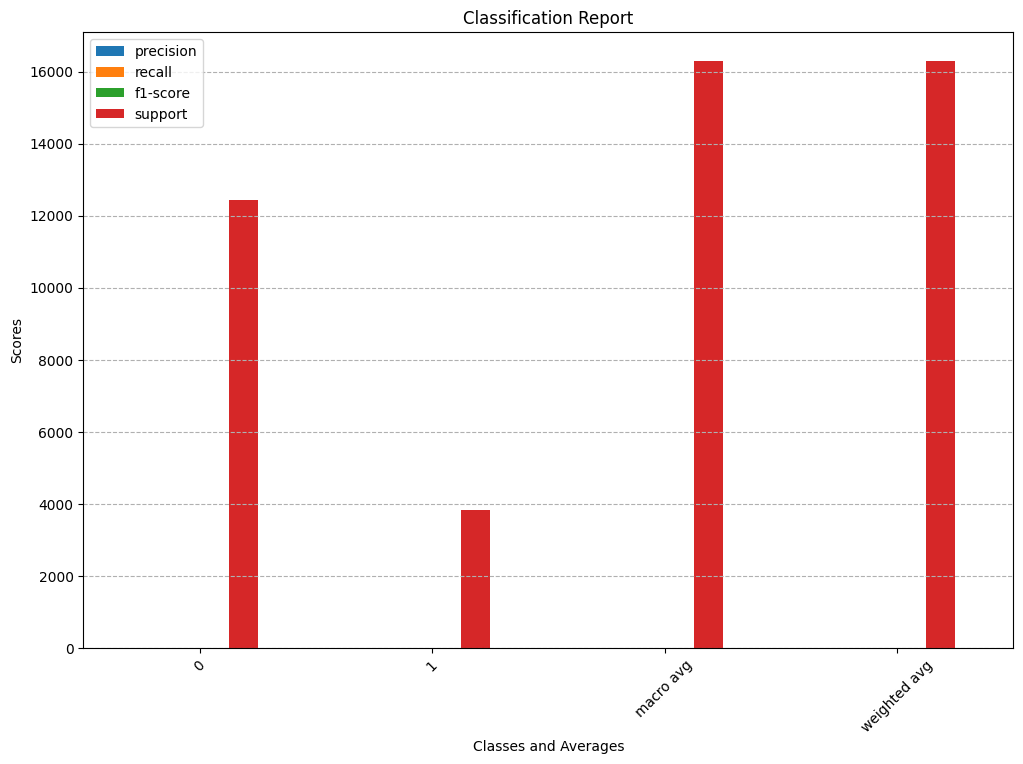

In [ ]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, naive_base_y_predictions, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Removing accuracy column
report_df.drop(['accuracy'], inplace=True)

report_df.plot(kind='bar', figsize=(12, 8))
plt.title('Classification Report')
plt.xlabel('Classes and Averages')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.show()

######**Confusion Matix**

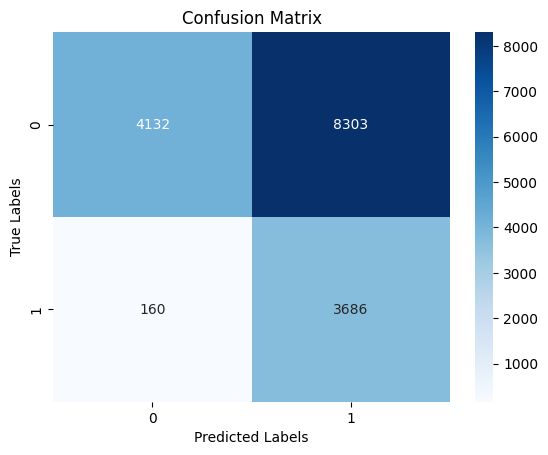

In [ ]:
from sklearn.metrics import confusion_matrix

naive_bayes_basic_model_confussion_matrix = confusion_matrix(y_test, naive_base_y_predictions)

sns.heatmap(naive_bayes_basic_model_confussion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

######**ROC Curve**

In [ ]:
y_prob = naive_base_basic_model.predict_proba(X_test_scaled)[:, 1]

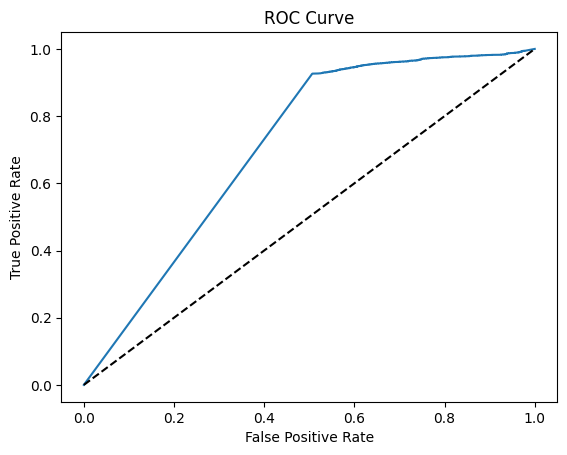

AUC (Using probabilities): 0.7111


In [ ]:
from sklearn.metrics import roc_curve

# For binary classification, get the probability of the positive class

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC using probabilities
naive_bayes_basic_model_auc_prob = roc_auc_score(y_test, y_prob)
print(f"AUC (Using probabilities): {naive_bayes_basic_model_auc_prob:.4f}")

######**Precision-Recall Curve**

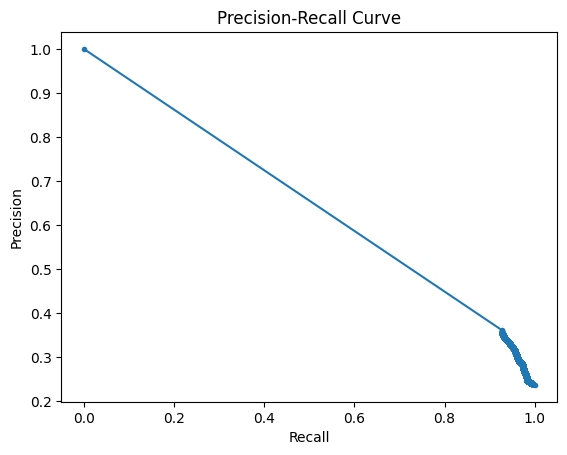

AUC Precision-Recall: 0.6522


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(y_test, y_prob)
naive_bayes_basic_model_auc_precision_recall = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print(f"AUC Precision-Recall: {naive_bayes_basic_model_auc_precision_recall:.4f}")

######**Learning Curve**

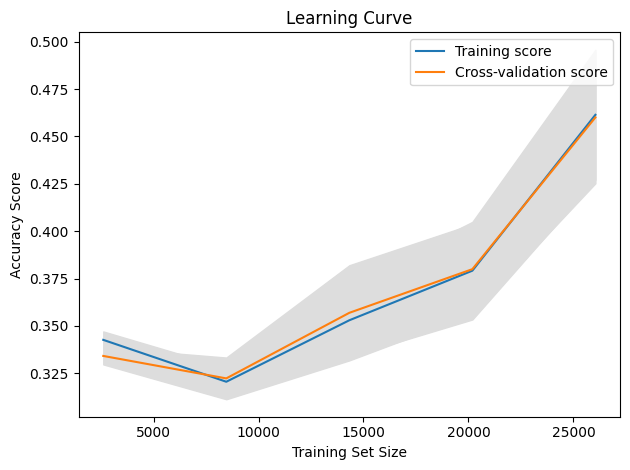

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(naive_base_basic_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

######**CV score**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(naive_base_basic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"CV Accuracy Scores: {cv_scores}")
print(f"CV Accuracy Mean: {cv_scores.mean():.4f}")

CV Accuracy Scores: [0.42300015 0.43719287 0.51121007 0.49170762 0.43703931]
CV Accuracy Mean: 0.4600


###**Naive Bayes Experimental Model**





In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()


param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Define multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Initialize the GridSearchCV object with multiple scorers
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')

# Fit to the training data
grid_search.fit(X_train_scaled, y_train)

# Results for each metric
results = grid_search.cv_results_
for scorer in scoring:
    print(f"Best '{scorer}' score: {results['mean_test_' + scorer][grid_search.best_index_]}")


Best 'accuracy' score: 0.6251960358247783
Best 'precision' score: 0.3840582191029984
Best 'recall' score: 0.9211840376686047
Best 'f1' score: 0.5420939863607661
Best 'roc_auc' score: 0.8482476263778016


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Predictions
naive_bayes_experimental_model_y_prediction = best_model.predict(X_test_scaled)

# Probability scores for the positive class
naive_bayes_experimental_model_y_probability = best_model.predict_proba(X_test_scaled)[:, 1]

###**Naive Bayes Experimental Model Evaluation**

######**Classification Report**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve

report = classification_report(y_test, naive_bayes_experimental_model_y_prediction)
print(report)

accuracy = accuracy_score(y_test, naive_bayes_experimental_model_y_prediction)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.95      0.54      0.69     12435
           1       0.38      0.91      0.53      3846

    accuracy                           0.62     16281
   macro avg       0.66      0.72      0.61     16281
weighted avg       0.82      0.62      0.65     16281

Accuracy: 0.6245930839629016


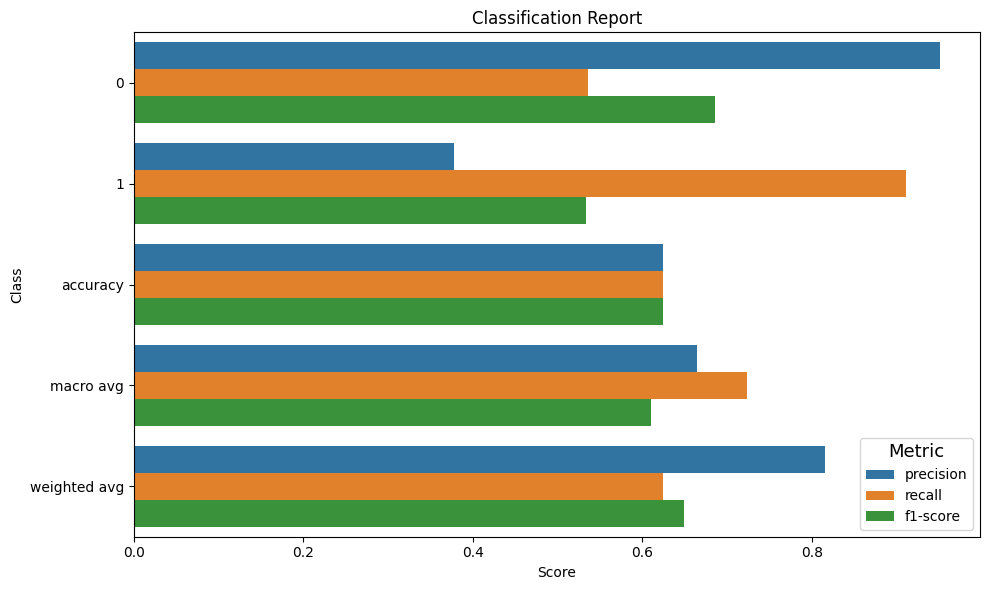

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, naive_bayes_experimental_model_y_prediction, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Dropping the 'support' column
df_report.drop('support', axis=1, inplace=True, errors='ignore')

# Reset index to get the classes as a column
df_report.reset_index(inplace=True)

# Melt the DataFrame to have proper columns for seaborn
df_melt = df_report.melt(id_vars="index", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='index', hue='Metric', data=df_melt)
plt.xlabel('Score')
plt.ylabel('Class')
plt.title('Classification Report')
plt.legend(title='Metric', title_fontsize='13', loc='lower right')
plt.tight_layout()
plt.show()

######**Confussion Matrix**

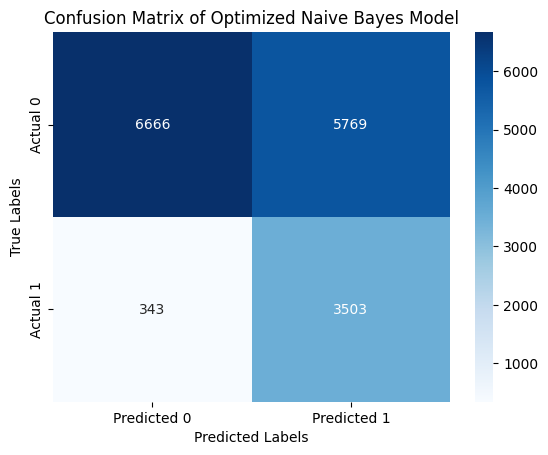

In [ ]:
naive_bayes_experimental_model_confussion_matrix = confusion_matrix(y_test, naive_bayes_experimental_model_y_prediction)

# Plot the confusion matrix
sns.heatmap(naive_bayes_experimental_model_confussion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Optimized Naive Bayes Model')
plt.show()

######**ROC Curve**

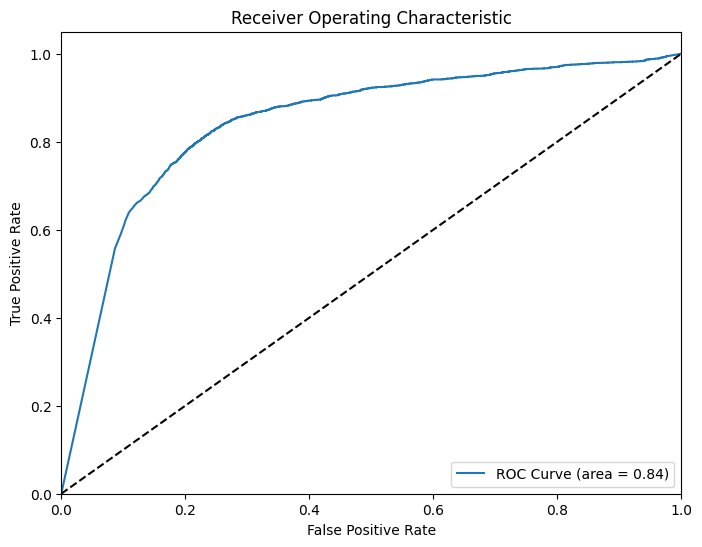

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_experimental_model_y_probability)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, naive_bayes_experimental_model_y_probability))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

######**Precision Recall Curve (PRC)**

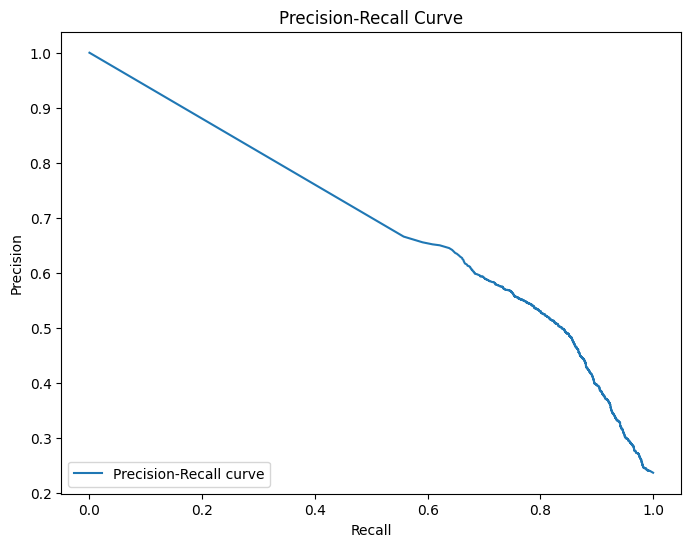

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, naive_bayes_experimental_model_y_probability)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

######**Learning Curve**

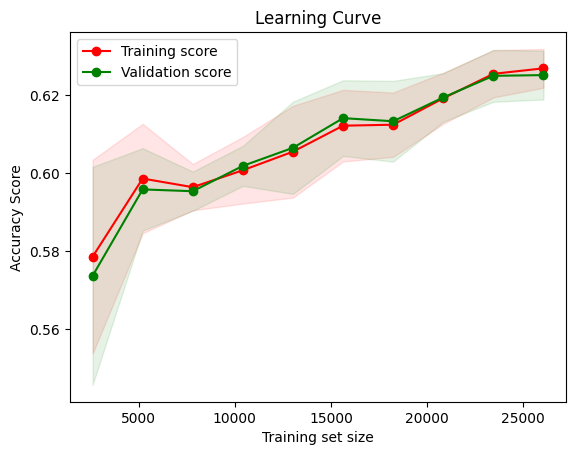

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing']),
    X = X_train_scaled,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'accuracy'  # "accuracy" or "precision" or "F1" or "recall"
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, color='g', alpha=0.1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation score')

plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

#**Random Forest**

###**Random Forest Basic Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_basic_model = RandomForestClassifier()
random_forest_basic_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
random_forest_basic_model.score(X_test_scaled,y_test)

0.8485351022664456

In [ ]:
random_forest_basic_model_y_prediction = random_forest_basic_model.predict(X_test_scaled)

In [ ]:
importances = dict(zip(X_train.columns, random_forest_basic_model.feature_importances_))
importances_sorted = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
importances_sorted

{'workclass': 0.16367167628944704,
 'age': 0.1500840615898205,
 'education': 0.09671081686405071,
 'marital-status': 0.08409350309622353,
 'fnlwgt': 0.056546028949884516,
 'education-num': 0.03014147399361119,
 'capital-gain': 0.010395110198260593,
 'hours-per-week': 0.008460709631220434,
 'capital-loss': 0.006168862387085316,
 'race': 0.0056798861347140085,
 'relationship': 0.005108470757380337,
 'native-country': 0.004616936757429751,
 'occupation': 0.001993190718451558,
 'sex': 1.197800895918904e-06}

###**Random Forest Basic Model Evaluation**

######**Classification Report**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'random_forest_basic_model_y_prediction' are the predictions from your model
# and 'y_test' are the true labels

# Generate the classification report
report = classification_report(y_test, random_forest_basic_model_y_prediction)

# Print the classification report
print("Classification Report:\n", report)

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, random_forest_basic_model_y_prediction)
print("Overall Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.71      0.61      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.84     16281

Overall Accuracy: 0.8485351022664456


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate weighted precision, recall, and F1-score
precision = precision_score(y_test, random_forest_basic_model_y_prediction, average='weighted')
recall = recall_score(y_test, random_forest_basic_model_y_prediction, average='weighted')
f1 = f1_score(y_test, random_forest_basic_model_y_prediction, average='weighted')

# Make sure to use X_test_scaled for consistency with training
y_prob = random_forest_basic_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Print out the metrics
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Weighted Precision: 0.8425
Weighted Recall: 0.8485
Weighted F1-Score: 0.8442
ROC AUC: 0.8991


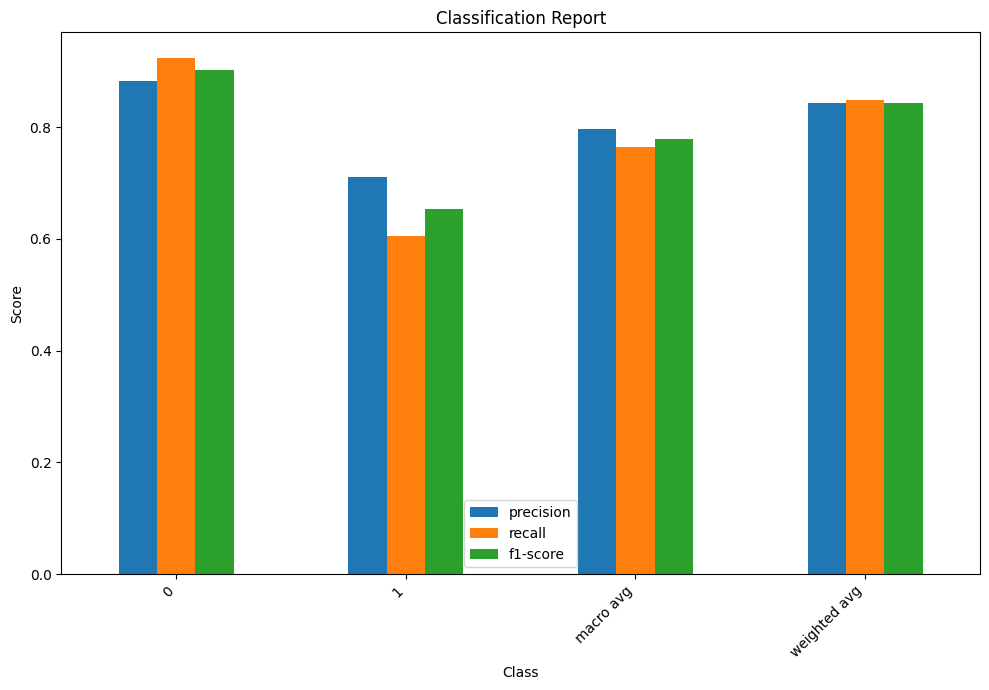

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_pred_forest are model predictions and y_test are the true labels
report_dict = classification_report(y_test, random_forest_basic_model_y_prediction, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

# Dropping the 'support' column
df_report.drop(columns='support', errors='ignore', inplace=True)

# Dropping 'accuracy' row
df_report.drop(index='accuracy', errors='ignore', inplace=True)

# Plotting with pandas (which uses Matplotlib)
ax = df_report.plot(kind='bar', figsize=(10, 7))
ax.set_title('Classification Report')
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_xticklabels(df_report.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


######**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

random_forest_basic_model_confussion_matrix = confusion_matrix(y_test, random_forest_basic_model_y_prediction)
random_forest_basic_model_confussion_matrix

array([[11486,   949],
       [ 1517,  2329]])

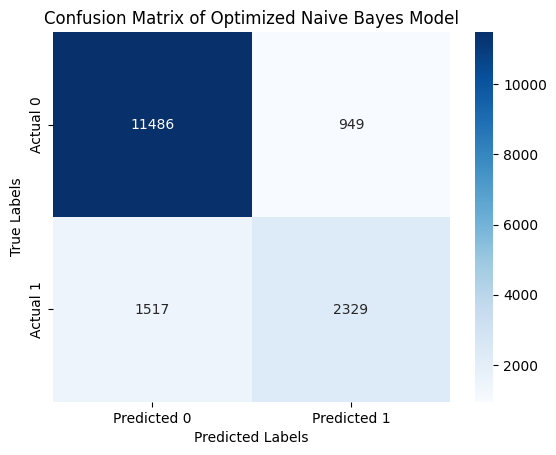

In [ ]:
# Plot the confusion matrix
sns.heatmap(random_forest_basic_model_confussion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Optimized Naive Bayes Model')
plt.show()

######**ROC Curve**

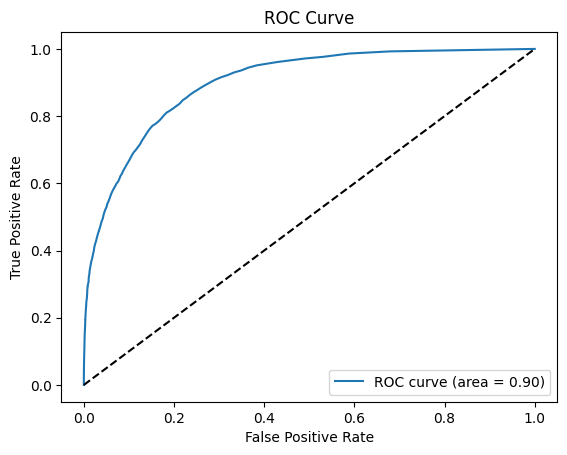

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Target should be binary before using roc_auc_score
if len(np.unique(y_test)) == 2:
    random_forest_basic_model_y_probability = random_forest_basic_model.predict_proba(X_test_scaled)[:, 1]  # probability estimates for the positive class
    roc_auc = roc_auc_score(y_test, random_forest_basic_model_y_probability)
    fpr, tpr, thresholds = roc_curve(y_test, random_forest_basic_model_y_probability)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

######**Precision-Recall Curve (PRC)**

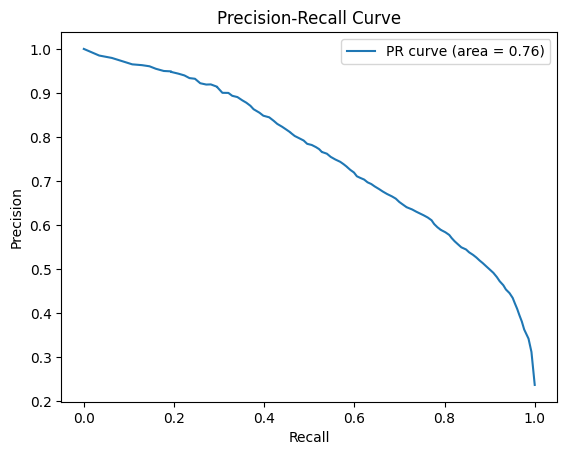

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, random_forest_basic_model_y_probability)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

######**Learning Curve**

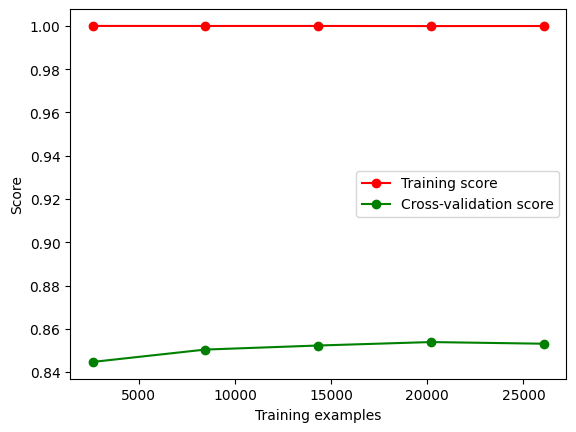

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(random_forest_basic_model, X_train_scaled, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

######**Column Importance**

In [ ]:
random_forest_basic_model.feature_importances_

array([1.50084062e-01, 1.63671676e-01, 5.65460289e-02, 9.67108169e-02,
       3.01414740e-02, 8.40935031e-02, 1.99319072e-03, 5.10847076e-03,
       5.67988613e-03, 1.19780090e-06, 1.03951102e-02, 6.16886239e-03,
       8.46070963e-03, 4.61693676e-03, 6.14006468e-05, 1.46170740e-03,
       1.97714549e-03, 8.04461147e-04, 2.64693828e-04, 7.08786516e-04,
       1.84789791e-03, 1.10068729e-03, 2.41556424e-03, 2.96485412e-03,
       1.27594456e-02, 3.13853360e-03, 7.53301127e-03, 8.02918029e-03,
       5.58259660e-05, 5.63954958e-03, 5.45682134e-03, 5.79989719e-03,
       3.32028006e-04, 6.25882657e-02, 8.63548951e-04, 2.47320445e-02,
       1.69412623e-03, 1.55601390e-03, 1.91396894e-03, 5.41977862e-03,
       1.25774068e-05, 6.43532898e-03, 1.99549385e-02, 4.14746172e-03,
       3.02568710e-03, 3.90809568e-03, 7.44545189e-03, 1.23499929e-04,
       1.66366719e-02, 2.93730655e-03, 6.78656606e-03, 4.59103820e-03,
       4.36084855e-03, 4.02083994e-02, 1.22352340e-02, 1.47179067e-03,
      

In [ ]:
# Ensuring "random_forest_experimental_model" is an instance of RandomForestClassifier
if isinstance(random_forest_basic_model, RandomForestClassifier):
    importances = dict(zip(X_train_encoded.columns, random_forest_basic_model.feature_importances_))
    importances_sorted = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
    for feature, importance in importances_sorted.items():
        print(f"{feature}: {importance}")
else:
    print("The model does not support feature_importances_. Please check the model type.")

fnlwgt: 0.16367167628944704
age: 0.1500840615898205
capital-gain: 0.09671081686405071
hours-per-week: 0.08409350309622353
marital-status_ Married-civ-spouse: 0.06258826566992008
education-num: 0.056546028949884516
relationship_ Husband: 0.040208399375902246
capital-loss: 0.03014147399361119
marital-status_ Never-married: 0.024732044461240933
occupation_ Exec-managerial: 0.019954938472736047
occupation_ Prof-specialty: 0.01663667190951443
education_ Bachelors: 0.012759445550183726
relationship_ Not-in-family: 0.012235234042386623
sex_ Female: 0.011243964057952917
workclass_ Private: 0.010395110198260593
relationship_ Wife: 0.010097054142217746
workclass_ Self-emp-not-inc: 0.008460709631220434
education_ Masters: 0.008029180289577236
education_ HS-grad: 0.007533011271351702
occupation_ Other-service: 0.007445451892853173
sex_ Male: 0.0073678367347698144
occupation_ Sales: 0.0067865660604352965
relationship_ Own-child: 0.0065525465928257445
occupation_ Craft-repair: 0.006435328982593453
r

###**Random Forest Experimental Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
      'n_estimators': [ 290, 300, 310],
      'criterion': ['gini', 'entropy'],
      'max_depth': [ 37,40,45],
      'min_samples_split': [ 7,10, 13],
      'min_samples_leaf': [1,2,3]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [37, 40, 45],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [7, 10, 13],
                         'n_estimators': [290, 300, 310]},
             verbose=1)

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 290}
Best score:  0.8656062473427741


In [ ]:
# Best estimator found by the grid search
random_forest_experimental_model = grid_search.best_estimator_

# Predictions on test set
random_forest_best_y_prediction = random_forest_experimental_model.predict(X_test_scaled)

###**Random Forest Experimental Model Evaluation**

######**Classification Report**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Generate the classification report
report = classification_report(y_test, random_forest_best_y_prediction)
print("Classification Report:\n", report)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, random_forest_best_y_prediction)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     12435
           1       0.77      0.61      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.78      0.80     16281
weighted avg       0.86      0.86      0.86     16281

Accuracy: 0.8641361095755788


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

weighted_precision = precision_score(y_test, random_forest_best_y_prediction, average='weighted')
weighted_recall = recall_score(y_test, random_forest_best_y_prediction, average='weighted')
weighted_f1 = f1_score(y_test, random_forest_best_y_prediction, average='weighted')

y_prob = random_forest_experimental_model.predict_proba(X_test_scaled)[:, 1]  # Replace X_test_scaled with your test features

roc_auc = roc_auc_score(y_test, y_prob)
print(f"Weighted Average Precision: {weighted_precision:.4f}")
print(f"Weighted Average Recall: {weighted_recall:.4f}")
print(f"Weighted Average F1-Score: {weighted_f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Weighted Average Precision: 0.8584
Weighted Average Recall: 0.8641
Weighted Average F1-Score: 0.8585
ROC AUC: 0.9167


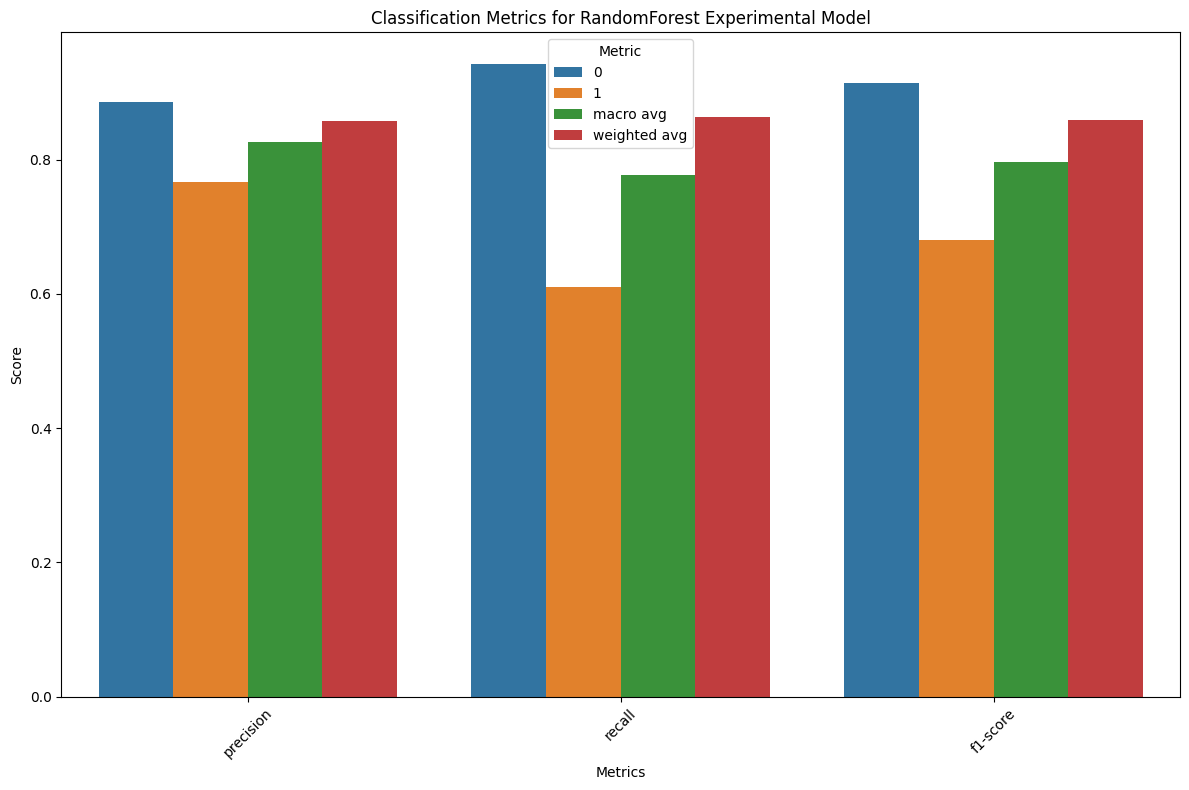

In [ ]:
# Classification report into a dictionary, then to a DataFrame conversion
report_dict = classification_report(y_test, random_forest_best_y_prediction, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# # Drop 'support' column and 'accuracy' row if present
report_df.drop(columns='support', errors='ignore', inplace=True)
report_df.drop(index='accuracy', errors='ignore', inplace=True)

# Reset the index to use in plotting
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'Metric'}, inplace=True)

# Melt the DataFrame for seaborn plotting
melted_df = report_df.melt(id_vars="Metric", var_name="Measures", value_name="Score")

# Plot the classification report
plt.figure(figsize=(12, 8))
sns.barplot(x='Measures', y='Score', hue='Metric', data=melted_df)
plt.title('Classification Metrics for RandomForest Experimental Model')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()

######**Confusion Matrix**

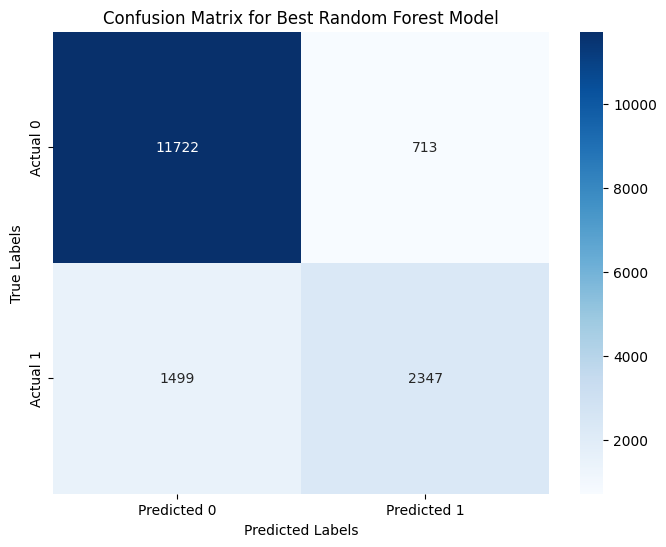

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix using true labels and predictions
random_forest_experimental_confussion_matrix = confusion_matrix(y_test, random_forest_best_y_prediction)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(random_forest_experimental_confussion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

######**ROC Curve**

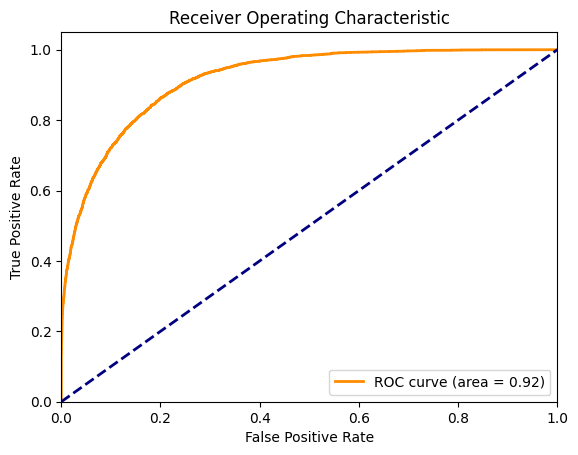

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilities
random_forest_best_y_probability = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_best_y_probability)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

######**Precision-Recall Curve (PRC)**

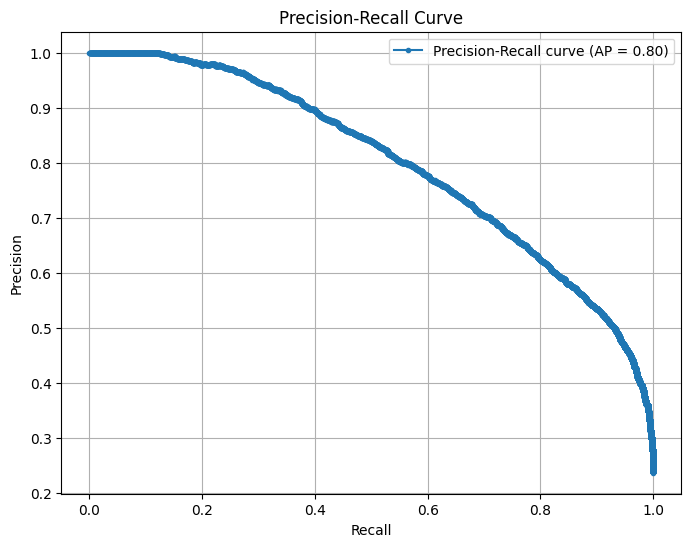

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, random_forest_best_y_probability)
ap_score = average_precision_score(y_test, random_forest_best_y_probability)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

######**Learning Curve**

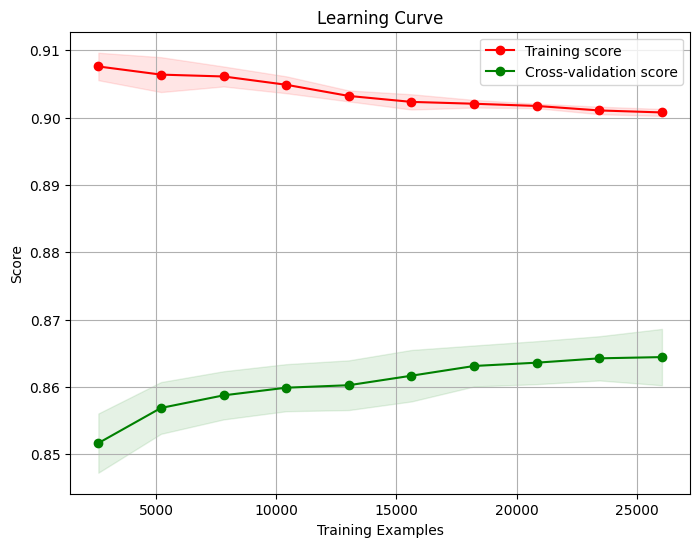

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=grid_search.best_estimator_, # Best model
    X=X_train_scaled,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), # Training set sizes
    cv=5, # Cross-validation splitting strategy
    n_jobs=-1,
    scoring='accuracy' # different scoring if needed("")
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

######**Column Importance**

In [ ]:
random_forest_experimental_model.feature_importances_

array([9.90739414e-02, 5.45992850e-02, 8.00659245e-02, 1.26083168e-01,
       3.35152500e-02, 6.02916116e-02, 2.08013818e-03, 3.83810077e-03,
       3.94423835e-03, 3.12831789e-09, 7.35300718e-03, 5.18577183e-03,
       6.77303888e-03, 3.03233590e-03, 2.78084474e-05, 1.94594958e-03,
       3.08494404e-03, 5.59343835e-04, 3.65098460e-04, 9.16642300e-04,
       3.19291371e-03, 1.75416426e-03, 1.88655136e-03, 2.40470053e-03,
       1.48794092e-02, 4.41055858e-03, 9.81173018e-03, 9.65701575e-03,
       4.51388828e-05, 6.31739722e-03, 5.37367997e-03, 9.12553565e-03,
       2.63972100e-04, 1.09824679e-01, 7.21703324e-04, 5.35308415e-02,
       2.30112567e-03, 2.03969956e-03, 2.30746860e-03, 4.64193721e-03,
       3.06544566e-06, 4.73482637e-03, 2.35259691e-02, 4.71385394e-03,
       3.49026667e-03, 3.82067322e-03, 1.08028152e-02, 1.23721617e-04,
       1.87907848e-02, 2.35745774e-03, 4.83667847e-03, 3.79175456e-03,
       3.25098376e-03, 6.28769047e-02, 1.67132235e-02, 1.74159919e-03,
      

In [ ]:
# Ensuring "random_forest_experimental_model" is an instance of RandomForestClassifier
if isinstance(random_forest_experimental_model, RandomForestClassifier):
    importances = dict(zip(X_train_encoded.columns, random_forest_experimental_model.feature_importances_))
    importances_sorted = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
    for feature, importance in importances_sorted.items():
        print(f"{feature}: {importance}")
else:
    print("The model does not support feature_importances_. Please check the model type.")


capital-gain: 0.12608316764749364
marital-status_ Married-civ-spouse: 0.10982467889482295
age: 0.0990739413586876
education-num: 0.08006592453920351
relationship_ Husband: 0.06287690471556448
hours-per-week: 0.06029161163415863
fnlwgt: 0.05459928503359297
marital-status_ Never-married: 0.05353084145723027
capital-loss: 0.03351524997406733
occupation_ Exec-managerial: 0.023525969067754293
relationship_ Own-child: 0.020487021794297892
occupation_ Prof-specialty: 0.018790784777690923
relationship_ Wife: 0.017306678658612986
relationship_ Not-in-family: 0.016713223520191594
education_ Bachelors: 0.014879409185005374
sex_ Female: 0.013636544819641563
sex_ Male: 0.012443078625316425
occupation_ Other-service: 0.010802815176850384
education_ HS-grad: 0.0098117301759961
education_ Masters: 0.009657015745132417
marital-status_ Divorced: 0.009125535650799703
relationship_ Unmarried: 0.007548609872454946
workclass_ Private: 0.007353007182748045
workclass_ Self-emp-not-inc: 0.006773038875842442
ed